In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [3]:
wine = pd.read_csv("C:\\Users\\Arabinda\\Desktop\\winequality-red.csv")

In [4]:
wine.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [5]:
wine.columns

Index(['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar',
       'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density',
       'pH', 'sulphates', 'alcohol', 'quality'],
      dtype='object')

In [7]:
wine["quality"].value_counts()

5    681
6    638
7    199
4     53
8     18
3     10
Name: quality, dtype: int64

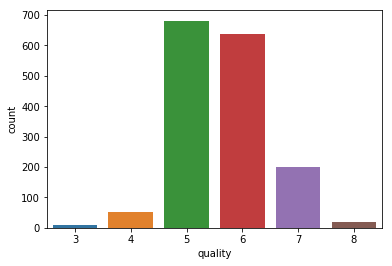

In [8]:
sns.countplot(wine['quality'])

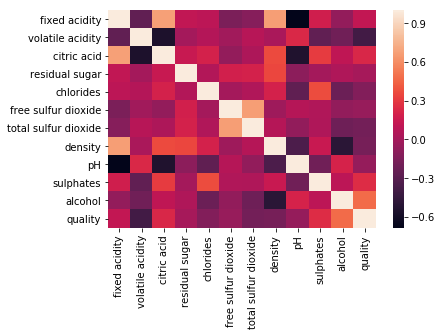

In [9]:
sns.heatmap(wine.corr())

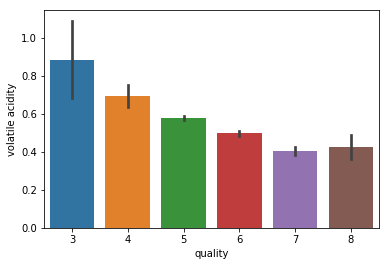

In [10]:
sns.barplot(x = 'quality', y = 'volatile acidity', data = wine)

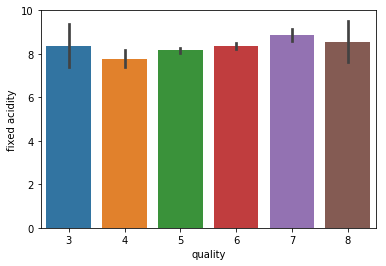

In [11]:
sns.barplot(x = 'quality', y = 'fixed acidity', data = wine)

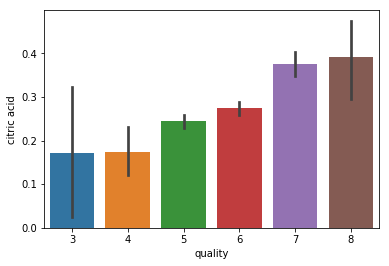

In [12]:
sns.barplot(x = 'quality', y = 'citric acid', data = wine)

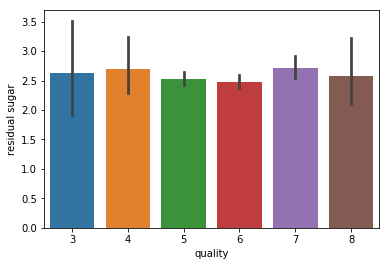

In [13]:
sns.barplot(x = 'quality', y = 'residual sugar', data = wine)

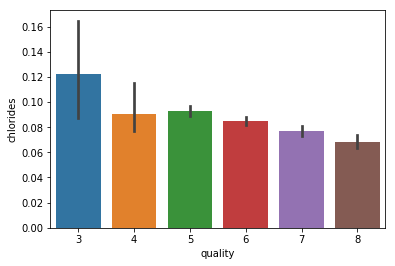

In [14]:
sns.barplot(x = 'quality', y = 'chlorides', data = wine)

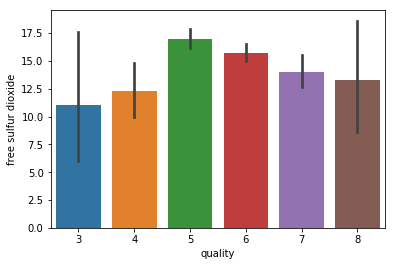

In [15]:
sns.barplot(x = 'quality', y = 'free sulfur dioxide', data = wine)

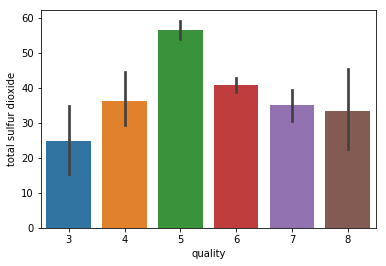

In [16]:
sns.barplot(x = 'quality', y = 'total sulfur dioxide', data = wine)

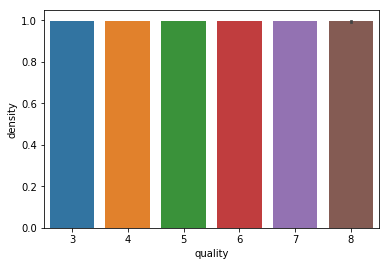

In [17]:
sns.barplot(x = 'quality', y = 'density', data = wine)

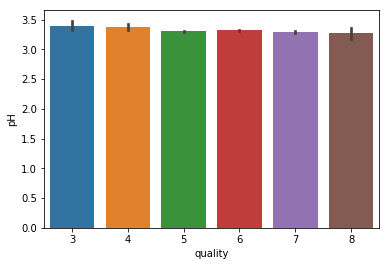

In [18]:
sns.barplot(x = 'quality', y = 'pH', data = wine)

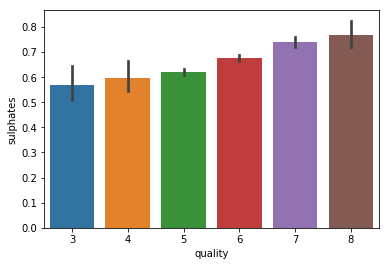

In [19]:
sns.barplot(x = 'quality', y = 'sulphates', data = wine)

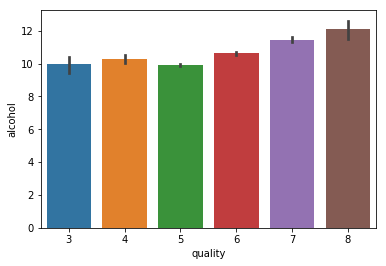

In [20]:
sns.barplot(x = 'quality', y = 'alcohol', data = wine)

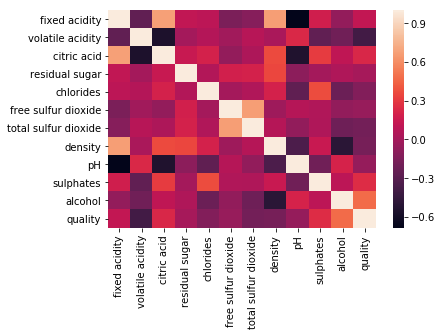

In [21]:
sns.heatmap(wine.corr())

In [22]:
quality = wine["quality"].values
category = []
for num in quality:
    if num < 5:
        category.append("Low")
    elif num > 6:
        category.append("High")
    else:
        category.append("Midium")
category = pd.DataFrame(data=category, columns=["category"])
data = pd.concat([wine, category], axis=1)
data.drop(columns="quality", axis=1, inplace=True)

In [24]:
data.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,category
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,Midium
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,Midium
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,Midium
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,Midium
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,Midium


In [25]:
X = data.iloc[:, :-1].values
y = data.iloc[:, -1].values

In [27]:
from sklearn.model_selection import train_test_split

In [28]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=1)

In [29]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
from sklearn import tree

In [31]:
clf = DecisionTreeClassifier(criterion = "entropy",random_state= 0,max_depth = 2,min_samples_leaf = 5)
clf.fit(X_train,y_train)

DecisionTreeClassifier(class_weight=None, criterion='entropy', max_depth=2,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=5, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=0,
            splitter='best')

In [33]:
y_pred = clf.predict(X_test)

In [35]:
accuracy_score(y_test,y_pred)*100

85.625